# ML Zoomcamp - Homework 2024

## Data preparation

In [1]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-10-26 03:04:36--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-10-26 03:04:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.04s   

2024-10-26 03:04:36 (10.2 MB/s) - ‘jamb_exam_result

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column 'JAMB_Score').

In [2]:
import pandas as pd

csv_path = '/content/jamb_exam_results.csv'
df = pd.read_csv(csv_path)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [3]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


Preparation:

- Remove the student_id column.

- Fill missing values with zeros.

- Do train/validation/test split with 60%/20%/20% distribution.

- Use the train_test_split function and set the random_state parameter to 1.

- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

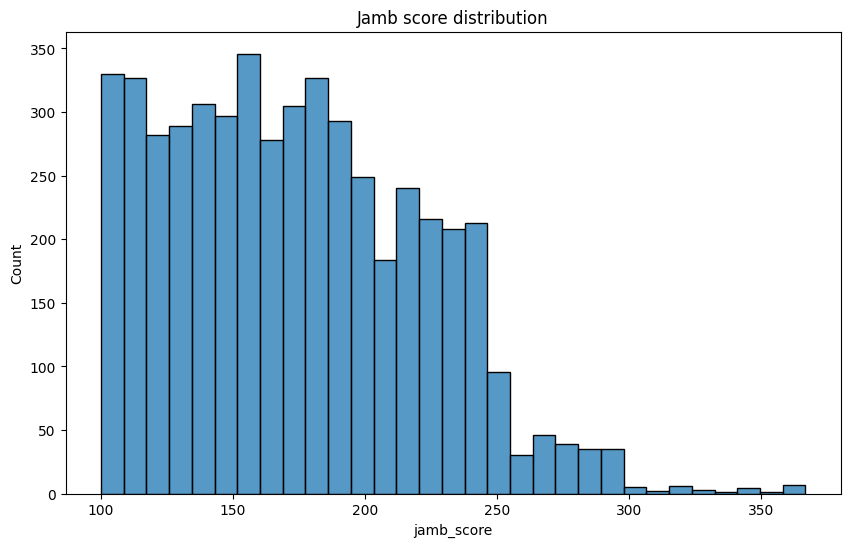

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='jamb_score')
plt.title('Jamb score distribution')
plt.show()

1. Remove the student_id column.


In [5]:
del df['student_id']

In [6]:
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

2. Fill missing values with 0s

In [7]:
df.isnull().sum()

,0
jamb_score,0
study_hours_per_week,0
attendance_rate,0
teacher_quality,0
distance_to_school,0
school_type,0
school_location,0
extra_tutorials,0
access_to_learning_materials,0
parent_involvement,0


In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

,0
jamb_score,0
study_hours_per_week,0
attendance_rate,0
teacher_quality,0
distance_to_school,0
school_type,0
school_location,0
extra_tutorials,0
access_to_learning_materials,0
parent_involvement,0


3. Do train/validation/test split with 60%/20%/20% distribution.

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']



4. Use DictVectorizer(sparse=True) to turn the dataframes into matrices

In [11]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1


Let's train a decision tree regressor to predict the jamb_score variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

- study_hours_per_week
- attendance_rate
- teacher_quality
- distance_to_school


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [13]:
print(export_text(dt, feature_names = dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



**Answer**_ study_hours_per_week

## Question 2

Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

- 22.13
- 42.13
- 62.13
- 82.12


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [15]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [16]:
y_pred = rf.predict(X_val)

In [17]:
root_mean_squared_error(y_val, y_pred)

42.13724207871227

**Answer**: 42.13

Analisi dell'importanza delle singole feature:

In [18]:
for feature, importance in zip(dv.feature_names_, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Vedere un singolo albero della foresta
from sklearn.tree import export_text
# print(export_text(rf.estimators_[0], feature_names=dv.feature_names_))

access_to_learning_materials=No: 0.0114
access_to_learning_materials=Yes: 0.0111
age: 0.0695
assignments_completed: 0.0318
attendance_rate: 0.1501
distance_to_school: 0.1367
extra_tutorials=No: 0.0124
extra_tutorials=Yes: 0.0106
gender=Female: 0.0108
gender=Male: 0.0079
it_knowledge=High: 0.0176
it_knowledge=Low: 0.0128
it_knowledge=Medium: 0.0100
parent_education_level: 0.0000
parent_education_level=Primary: 0.0159
parent_education_level=Secondary: 0.0160
parent_education_level=Tertiary: 0.0149
parent_involvement=High: 0.0222
parent_involvement=Low: 0.0140
parent_involvement=Medium: 0.0113
school_location=Rural: 0.0091
school_location=Urban: 0.0098
school_type=Private: 0.0100
school_type=Public: 0.0079
socioeconomic_status=High: 0.0263
socioeconomic_status=Low: 0.0107
socioeconomic_status=Medium: 0.0093
study_hours_per_week: 0.2472
teacher_quality: 0.0827


## Question 3

Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

n_estimators=10, RMSE=42.137
n_estimators=20, RMSE=41.461
n_estimators=30, RMSE=41.106
n_estimators=40, RMSE=40.917
n_estimators=50, RMSE=40.852
n_estimators=60, RMSE=40.784
n_estimators=70, RMSE=40.677
n_estimators=80, RMSE=40.539
n_estimators=90, RMSE=40.504
n_estimators=100, RMSE=40.517
n_estimators=110, RMSE=40.593
n_estimators=120, RMSE=40.625
n_estimators=130, RMSE=40.651
n_estimators=140, RMSE=40.595
n_estimators=150, RMSE=40.597
n_estimators=160, RMSE=40.604
n_estimators=170, RMSE=40.628
n_estimators=180, RMSE=40.641
n_estimators=190, RMSE=40.631
n_estimators=200, RMSE=40.601


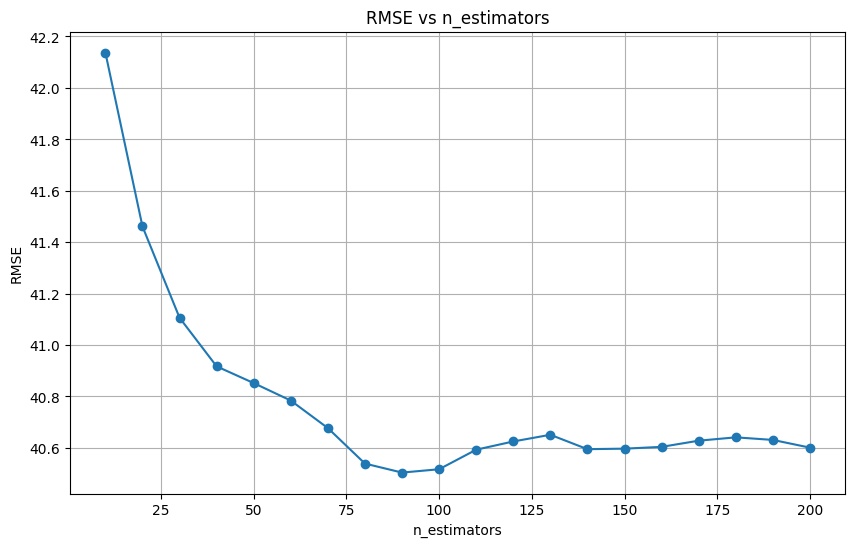

In [19]:
n_estimators = range(10, 201, 10)

rmse_scores = []

for n in n_estimators:
  rf = RandomForestRegressor(
      n_estimators = n,
      random_state = 1,
      n_jobs = -1
  )
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_val)

  rmse = round(root_mean_squared_error(y_val, y_pred), 3)
  rmse_scores.append(rmse)

  print(f'n_estimators={n}, RMSE={rmse}')

# Grafico per visualizzare i risultati
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, rmse_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)
plt.show()

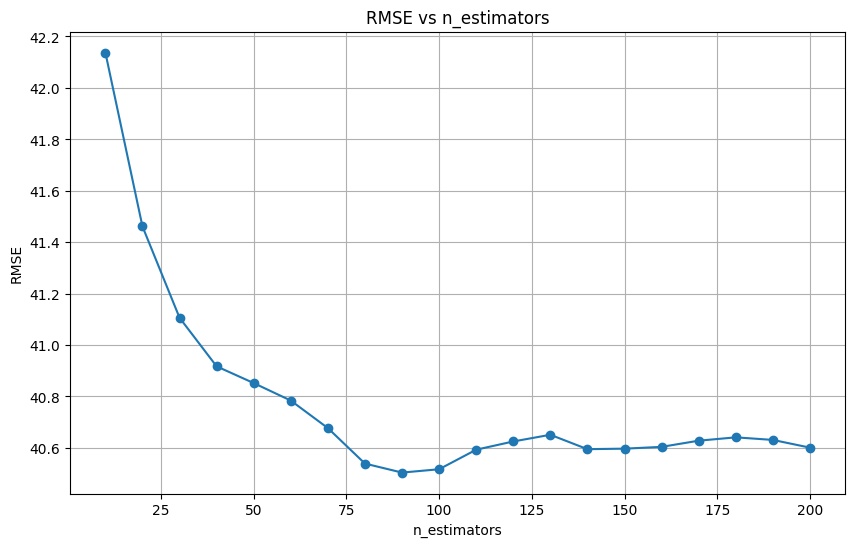

In [20]:
# Grafico per visualizzare i risultati
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, rmse_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)
plt.show()

**Answer**: 80

## Question 4

Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

- 10
- 15
- 20
- 25

In [21]:
from tqdm.auto import tqdm
import numpy as np

scores = []

for d in tqdm([10, 15, 20, 25]):
  rf = RandomForestRegressor(
      n_estimators = 0,
      max_depth=d,
      random_state=1,
      n_jobs = -1,
      warm_start=True
  )

  for n in tqdm(range(10, 201, 10)):
    rf.n_estimators = n
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    score = np.sqrt(root_mean_squared_error(y_val, y_pred))

    scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)




  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

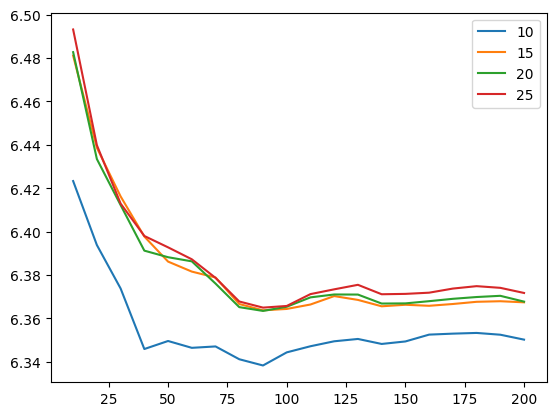

In [22]:
for d in [10, 15, 20, 25]:
  df_subset = df_scores[df_scores.max_depth == d]
  plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()
plt.show()

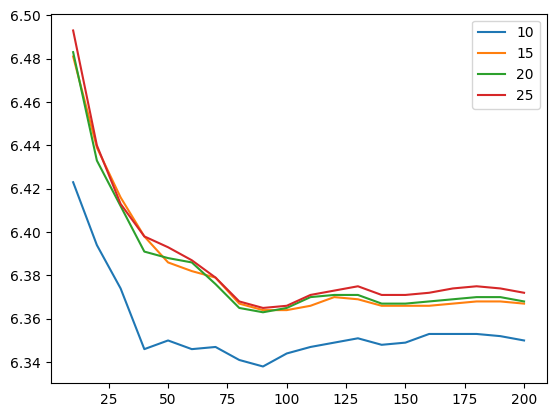

In [23]:
for d in [10, 15, 20, 25]:
  df_subset = df_scores[df_scores.max_depth == d]
  plt.plot(df_subset.n_estimators, df_subset.rmse.round(3), label=d)

plt.legend()
plt.show()

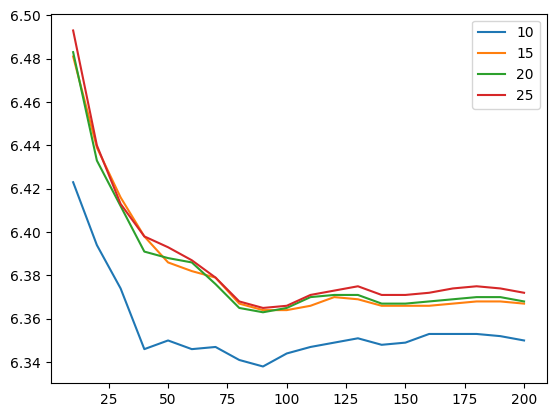

In [24]:
for d in [10, 15, 20, 25]:
  df_subset = df_scores[df_scores.max_depth == d]
  plt.plot(df_subset.n_estimators, df_subset.rmse.round(3), label=d)

plt.legend()
plt.show()

In [27]:
df_subset_sorted = df_subset.sort_values(by='max_depth')
df_subset_sorted

,max_depth,n_estimators,rmse
60,25,10,6.493107
77,25,180,6.374838
76,25,170,6.373725
75,25,160,6.371829
74,25,150,6.371278
73,25,140,6.371109
72,25,130,6.375455
71,25,120,6.373374
70,25,110,6.371178
69,25,100,6.365711


**Answer**: 10

Try again, slightly different approach:

In [28]:
max_depth_values = [10, 15, 20, 25]
n_estimators = range(10, 201, 10)

results ={}

for depth in max_depth_values:
  rmse_scores = []

  for n in n_estimators:
    rf = RandomForestRegressor(
        n_estimators=n,
        max_depth = depth,
        random_state=1,
        n_jobs = -1
    )
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = round(root_mean_squared_error(y_val, y_pred), 3)
    rmse_scores.append(rmse)

  mean_rmse = round(np.mean(rmse_scores), 3)
  results[depth] = mean_rmse
  print(f'max_depth={depth}, mean RMSE={mean_rmse}')

best_depth = min(results.keys(), key = lambda k: results[k])
print(f'\nIl miglior max_depth è {best_depth} con mean RMSE = {results[best_depth]}')


max_depth=10, mean RMSE=40.392
max_depth=15, mean RMSE=40.735
max_depth=20, mean RMSE=40.74
max_depth=25, mean RMSE=40.788

Il miglior max_depth è 10 con mean RMSE = 40.392


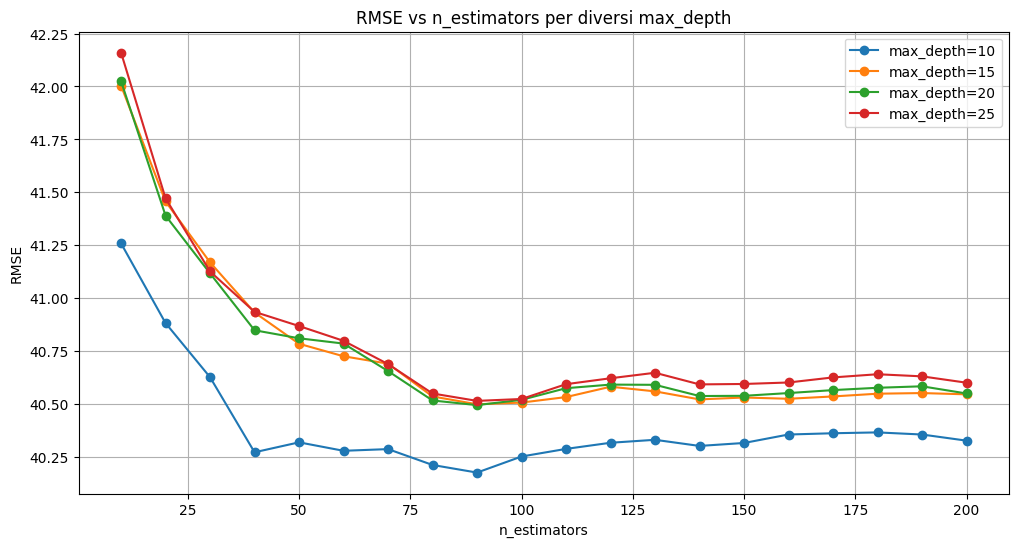

In [29]:
plt.figure(figsize=(12, 6))
for depth in max_depth_values:
    rmse_scores = []
    for n in n_estimators:
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=depth,
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = round(root_mean_squared_error(y_val, y_pred), 3)
        rmse_scores.append(rmse)
    plt.plot(n_estimators, rmse_scores, label=f'max_depth={depth}', marker='o')

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators per diversi max_depth')
plt.legend()
plt.grid(True)
plt.show()

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:

- n_estimators=10,
- max_depth=20,
- random_state=1,
- n_jobs=-1 (optional)

Get the feature importance information from this model

What's the most important feature (among these 4)?

- study_hours_per_week
- attendance_rate
- distance_to_school
- teacher_quality

In [30]:
rf = RandomForestRegressor(
      n_estimators = 10,
      max_depth=20,
      random_state=1,
      n_jobs = -1,
  )

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [34]:
df_importance = pd.DataFrame()
df_importance['feature'] = dv.feature_names_
df_importance['importance'] = rf.feature_importances_
df_importance.sort_values(by='importance', ascending=False)

,feature,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


**Answer**: study_hours_per_week

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:



```
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1
- Both give equal value



In [35]:
!pip install xgboost

In [36]:
import xgboost as xgb

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}


In [39]:
features = dv.feature_names_
features

['access_to_learning_materials=No',
 'access_to_learning_materials=Yes',
 'age',
 'assignments_completed',
 'attendance_rate',
 'distance_to_school',
 'extra_tutorials=No',
 'extra_tutorials=Yes',
 'gender=Female',
 'gender=Male',
 'it_knowledge=High',
 'it_knowledge=Low',
 'it_knowledge=Medium',
 'parent_education_level',
 'parent_education_level=Primary',
 'parent_education_level=Secondary',
 'parent_education_level=Tertiary',
 'parent_involvement=High',
 'parent_involvement=Low',
 'parent_involvement=Medium',
 'school_location=Rural',
 'school_location=Urban',
 'school_type=Private',
 'school_type=Public',
 'socioeconomic_status=High',
 'socioeconomic_status=Low',
 'socioeconomic_status=Medium',
 'study_hours_per_week',
 'teacher_quality']

In [40]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [41]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [42]:
def parse_xgb_output(output):
  results = []

  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')

    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])

    results.append((it, train, val))

  columns = ['num_iter', 'train_auc', 'val_auc']
  df_results = pd.DataFrame(results, columns=columns)
  return df_results


In [43]:
%%capture output_eta_3

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [46]:
scores['eta=0.3'] = parse_xgb_output(output_eta_3)

In [47]:
%%capture output_eta_1

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [48]:
scores['eta=0.1'] = parse_xgb_output(output_eta_1)

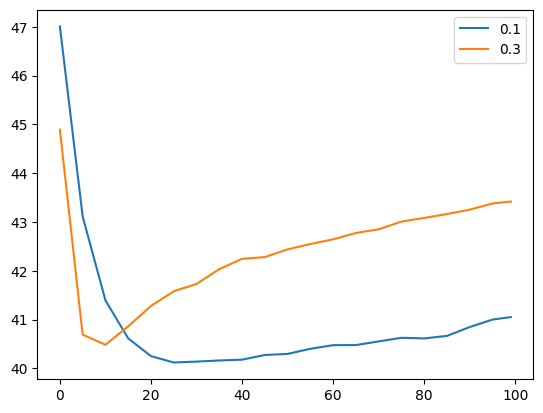

In [49]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()

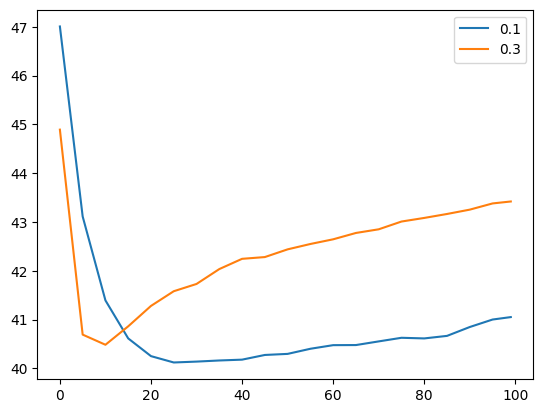

In [50]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc.round(3),
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc.round(3),
        label='0.3')
plt.legend()
plt.show()

**Answer**: 0.1